In [1]:
# Authors: Samantha Tetef and Vikram Kashyap
# Date: Winter 2020-2021 to Summer 2021

In [2]:
import warnings
warnings.filterwarnings("ignore")

import utils
from utils import *
from importlib import reload
# to reload utils, run:
utils = reload(utils)
from utils import *


import os
import copy
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.colors import to_hex
from matplotlib.colors import ListedColormap
import mplcursors

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy

from itertools import compress

from pathlib import Path

import webbrowser

warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\saman\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\saman\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [4]:
ROOTDIR = Path()

CIDdir = ROOTDIR/"ProcessedData"
Listdir = ROOTDIR/"Categories"

X_data = get_Data(Listdir)

In [5]:
X_data_classed = [c for c in X_data if c['Class']!='None']
compoundmap = {compound['CID']:compound for compound in X_data_classed}

CIDs = np.array([c['CID'] for c in X_data_classed])
NoneCIDs = np.array([c['CID'] for c in X_data if c['Class']=='None'])

# CLASSSIFICATION MAPS
# classes
classcodemap = {compound['CID']:CLASSCODES[compound['Class']] for compound in X_data_classed
                if compound['Class'] in CLASSCODES.keys()}
# coordination
coordcodemap = {compound['CID']:COORDCODES[compound['Class']] for compound in X_data_classed
                if compound['Class'] in COORDCODES.keys()}
# phosphorane subclasses
phosphoranecodemap = {compound['CID']:PHOSPHORANECODES[compound['Class']] for compound in X_data_classed
                      if compound['Class'] in PHOSPHORANECODES.keys()}
# phosphorane subclasses
sulfurcodemap = {compound['CID']:SULFURCODES[compound['Class']] for compound in X_data_classed
                 if compound['Class'] in SULFURCODES.keys()}
# chargemap
# chargemap = {compound['CID']:compound['Charge'] for compound in X_data_classed if compound['Charge'] != -1}
chargemap = {compound['CID']:compound['Charge'] for compound in X_data_classed}

classnames = list(CLASSCODES.keys())[:-1]

XANES_energies = X_data[0]['XANES_Spectra'][0]
XES_energies = X_data[0]['XES_Spectra'][0]

In [6]:
len(X_data_classed)

853

In [7]:
# good, bad = 0, 0
# diff = []
# really_bad = []
# for compound in X_data_classed[5:]:
#     x, y = compound['XANES_Transitions']
#     x = x + 50
#     whiteline_E = x[-5:][np.argmax(y[-5:])]
#     max_E = 10
    
#     last_trans = x[0]
#     e_diff = last_trans - whiteline_E
#     diff.append(e_diff)
    
#     if e_diff < 8:
#         really_bad.append(compound['CID'])
    
#     if e_diff > max_E:
#         good += 1
#     else:
#         bad += 1

# diff = np.array(diff)
# print(f'{good} good vs {bad} bad')
# print(np.average(diff), ' +/- ', np.std(diff))

In [8]:
# fig, ax = plt.subplots(figsize=(16,6))
# diff = diff[diff < 25]
# plt.hist(diff, bins=18*2+1, edgecolor='w', facecolor='green')
# plt.xlim(7,22)
# plt.yticks(fontsize=18)
# plt.xticks(np.arange(7,26), fontsize=18)
# plt.show()

In [9]:
# for c in X_data_classed:
#     if c['CID'] in really_bad:
#         x, y = c['XANES_Transitions']
#         plot_spectrum_and_trans(c['XANES_Spectra'], (x+50,y), c['CID'])

# Visualization of Classification Distributions

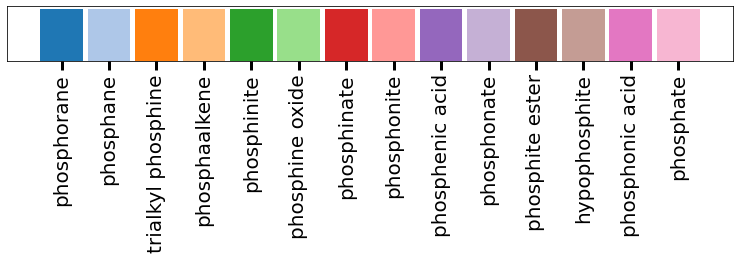

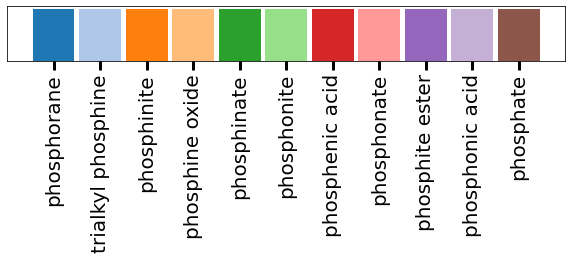

In [10]:
bins = [1 for classname in classnames]
hist(bins, [c.replace('_', ' ') for c in classnames], verbose=False)

coord_clasnames = list(COORDCODES.keys())
bins = [1 for classname in coord_clasnames]
hist(bins, [c.replace('_', ' ') for c in coord_clasnames], verbose=False)

# bins = [1 for coord in [3,4]]
# hist(bins, np.array([3,4]), verbose=False, xlabel='Coordination')

### Check calulcations

# Theory and Experiment Comparison

In [11]:
# checkcids = [11776, 13097, 8289]

# for cid in checkcids:    
#     c = compoundmap[cid]
#     trans = c['XANES_Transitions']
#     trans = esnip(trans, c['XANES_Normalized'], energy=XANES_energies, mode='xanes')
#     plot_spectrum_and_trans([XANES_energies, c['XANES_Normalized']], trans, f'{cid}', label='XANES')

In [12]:
# df1 = pd.read_csv('ExperimentalData/Ph3P.csv')
# df2 = pd.read_csv('ExperimentalData/Ph3PO.csv')
# df3 = pd.read_csv('ExperimentalData/PhO3PO.csv')

# hc = 1.23984193e-6 #ev/m
# d = 6.5327e-10 #m
# def to_energy(two_theta):
#     return hc/(d*np.sin(two_theta*(np.pi/180)/2))


# def stack_plot(Spectrums, Labels, title=None,
#                verbose=True, label=None, peaknorm=True):
    
#     n = len(Spectrums)
#     Colors=plt.cm.viridis(np.arange(n)/(n+1))
#     if n == 2:
#         Colors=['black', 'red']
#     fig, ax = plt.subplots(figsize=(10,8))

#     i = 0
#     for spectrum in Spectrums:
#         x, y = spectrum
#         if peaknorm:
#             y = y/np.max(y)
#         ax.plot(x, y, '-', color=Colors[i], linewidth=2, label=Labels[i])
#         i += 1

#     if title is not None:
#         plt.title(title, fontsize=20)
#     plt.xlabel('Energy (eV)', fontsize=18)
#     plt.tick_params(labelsize=16)

#     if verbose:
#         ax.xaxis.set_major_locator(MultipleLocator(5))
#         ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#         ax.xaxis.set_minor_locator(MultipleLocator(1))
#         ax.tick_params(direction='in', width=1, length=5, which='minor')

#     ax.tick_params(direction='in', width=2, length=8, which='major')

#     plt.legend(fontsize=20)
    
#     plt.show()

    
# ####################### spectrum 1
# cid = checkcids[0]
# x = to_energy(df1['2theta'].values)
# y = df1['I'].values
# y = y - np.min(y)
# y = y/np.max(y)
# emin, emax = 350, 800
# x2 = XES_energies[emin:emax]
# c = compoundmap[cid]
# y2 = c['XES_Normalized'][emin:emax]
# e_shift = x2[np.argmax(y2)] - x[np.argmax(y)]
# stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$Ph_3P$")

# ####################### spectrum 2
# cid = checkcids[2]
# x = to_energy(df3['2theta'].values)
# y = df3['I'].values
# y = y - np.min(y)
# y = y/np.max(y)
# emin, emax = 410, 750
# x2 = XES_energies[emin:emax]
# c = compoundmap[cid]
# y2 = c['XES_Normalized'][emin:emax]
# stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$PhO_3PO$", verbose=True)

# ML and Data Science section

## All Spectra Together

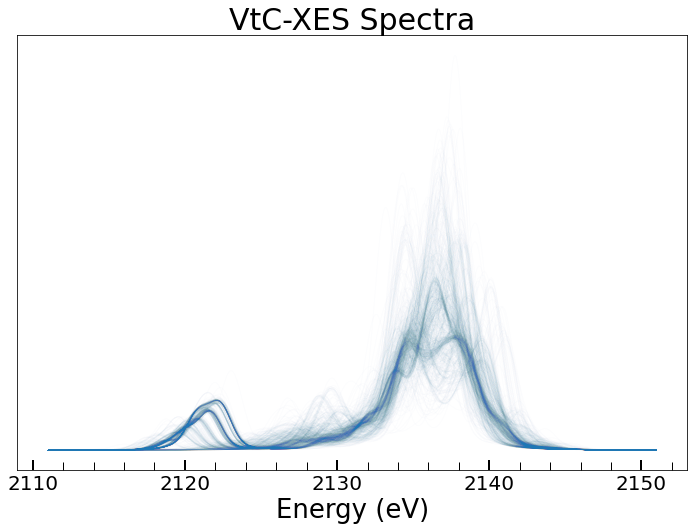

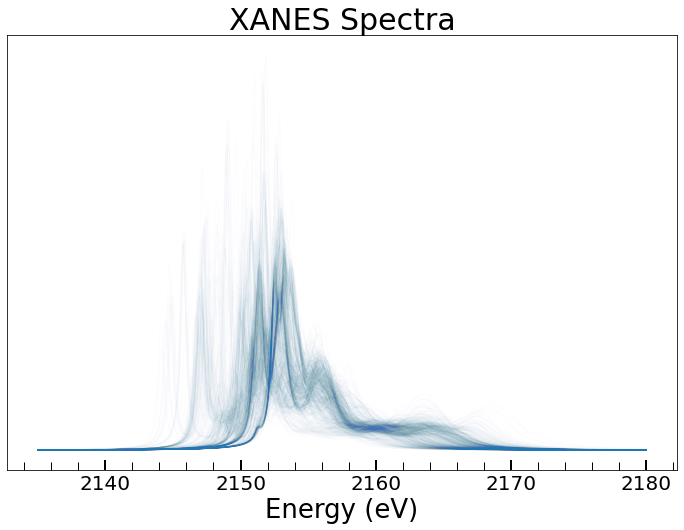

In [13]:
xesplt = plot_spaghetti(plt.subplots(figsize=(12,8)), compoundmap, mode='XES', coloralpha=0.01)
xanesplt = plot_spaghetti(plt.subplots(figsize=(12,8)), compoundmap, mode='XANES', coloralpha=0.01)

## Rainbow Spaghetti Plot: Color and Stack by Coordination

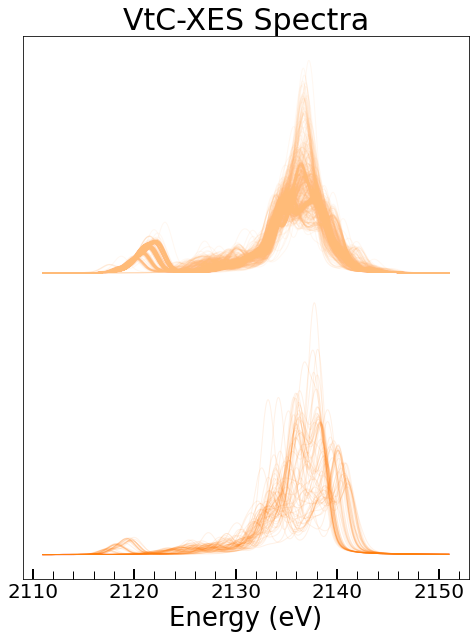

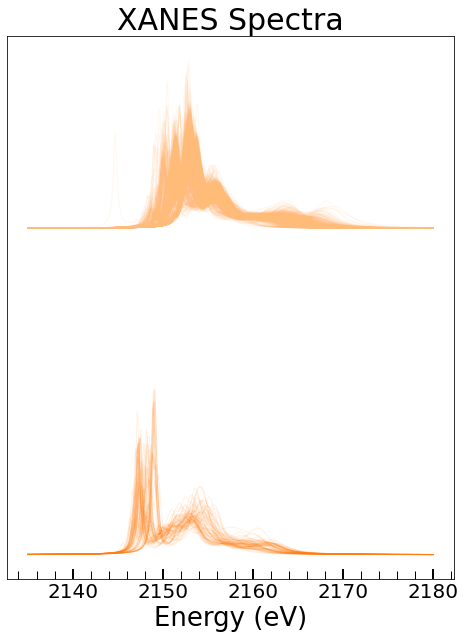

In [14]:
codemap = coordcodemap

hiddenCIDS = np.array([c['CID'] for c in X_data if not c['CID'] in codemap.keys()])

xesspagplt = plot_spaghetti(plt.subplots(figsize=(8,10)), compoundmap, colorcodemap=codemap, binmap=codemap,
               mode='XES', coloralpha=0.1, hiddencids=hiddenCIDS, colormap=plt.cm.tab10, hiddenalpha=0, scale=False)
xanesspagplt = plot_spaghetti(plt.subplots(figsize=(8,10)), compoundmap, colorcodemap=codemap, binmap=codemap,
               mode='XANES', coloralpha=0.1, hiddencids=hiddenCIDS, colormap=plt.cm.tab10, hiddenalpha=0, scale=False)

# Dimensionality Reduction

# PCA + t-SNE

In [15]:
XES = np.array([c['XES_Normalized'] for c in X_data_classed])
XANES = np.array([c['XANES_Normalized'] for c in X_data_classed])

# pca
pca_all_xes = PCA()
XES_PCA = pca_all_xes.fit_transform(XES)
pca_all_xanes = PCA()
XANES_PCA = pca_all_xanes.fit_transform(XANES)

N = XANES_PCA.shape[1]

explained_var_xes = np.array([np.sum(pca_all_xes.explained_variance_ratio_[:i+1]) for i in range(N)])
explained_var_xanes = np.array([np.sum(pca_all_xanes.explained_variance_ratio_[:i+1]) for i in range(N)])

threshold_xes = np.where(explained_var_xes >= 0.9)[0][0]
threshold_xanes = np.where(explained_var_xanes >= 0.9)[0][0]

print(f"VtC-XES takes {threshold_xes+1} PCs to explain {explained_var_xes[threshold_xes]:.04f} variance")
print(f"XANES takes {threshold_xanes+1} PCs to explain {explained_var_xanes[threshold_xanes]:.04f} variance")

VtC-XES takes 6 PCs to explain 0.9110 variance
XANES takes 12 PCs to explain 0.9108 variance


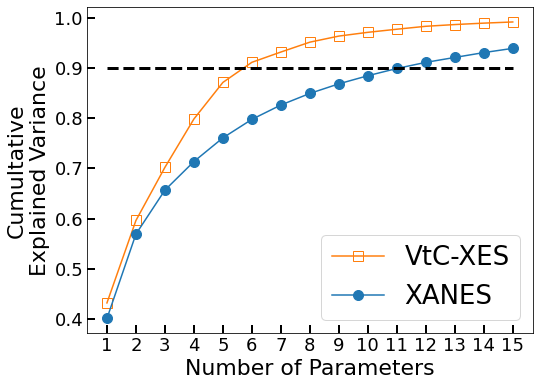

In [16]:
def make_stacked_scree(xes, xanes, n=None):
    
    if n is None:
        n = len(xanes)
    else:
        xes = xes[:n]
        xanes = xanes[:n]

    fig, ax = plt.subplots(figsize=(8,6))

    x = np.arange(n)+1
    
    cdf_xes = [np.sum(xes[:i+1]) for i in range(n)]
    cdf_xanes = [np.sum(xanes[:i+1]) for i in range(n)]

    ax.plot(x, cdf_xes, 's-', markersize=10, fillstyle='none', color=plt.cm.tab10(.15), label='VtC-XES')
    ax.plot(x, cdf_xanes, 'o-', markersize=10, color=plt.cm.tab10(0.05), label='XANES')
    ax.plot(x, np.ones(len(x))*0.9, 'k--', linewidth=3)

    plt.xticks(x, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Number of Parameters', fontsize=22)
    plt.ylabel(f'Cumultative\nExplained Variance', fontsize=22)
    ax.tick_params(direction='in', width=2, length=8)
    
    plt.legend(fontsize=26)

    plt.show()
    
make_stacked_scree(pca_all_xes.explained_variance_ratio_, pca_all_xanes.explained_variance_ratio_, n=15)

# Coordination

In [17]:
def get_subset_plots(X_data, mode='XANES', perplexity=5, **kwargs):
    
    if 'CID' in kwargs:
        if type(kwargs['CID'])==int:
            X_subset = [c for c in X_data if c['CID'] == kwargs['CID']]
        else:
            X_subset = [c for c in X_data if c['CID'] in kwargs['CID']]
    elif 'Class' in kwargs:
        X_subset = [c for c in X_data if c['Class'] in kwargs['Class']]
    elif 'Type' in kwargs:
        if type(kwargs['Type'])==int:
            X_subset = [c for c in X_data if c['Type'] == kwargs['Type']]
        else:
            X_subset = [c['CID'] for c in X_data if c['Type'] in kwargs['Type']]
           
    
    SPECTRA = np.array([c[f'{mode}_Normalized'] for c in X_subset])
    
    # pca
    pca_all = PCA()
    PCA_all = pca_all.fit_transform(SPECTRA)
    N = PCA_all.shape[1]
    explained_var = np.array([np.sum(pca_all.explained_variance_ratio_[:i+1]) for i in range(N)])
    threshold = np.where(explained_var >= 0.9)[0][0]
    
    pca_sub = PCA(n_components=threshold + 1)
    PCA_sub = pca_sub.fit_transform(SPECTRA)
    # tsne
    tsne_sub = TSNE(n_components=2, perplexity=perplexity, random_state=42, early_exaggeration=20)
    TSNE_sub = tsne_sub.fit_transform(PCA_sub)

    # Make CID->point maps
    tsnemap_sub = {compound['CID']:point for compound,point in zip(X_subset, TSNE_sub)}
    
    return X_subset, tsnemap_sub

In [18]:
def get_tsne_maps(codemap, xanes_perplexity=20, xes_perplexity=30):
    
    hiddenCIDS = np.array([c['CID'] for c in X_data if not c['CID'] in codemap.keys()])
    X_subset = [c for c in list(compoundmap.values()) if c['CID'] in codemap.keys()]

    XES = np.array([c['XES_Normalized'] for c in X_subset])
    XANES = np.array([c['XANES_Normalized'] for c in X_subset])

    # pca
    pca1 = PCA(n_components=6)
    XES_PCA = pca1.fit_transform(XES)

    # pca
    pca2 = PCA(n_components=12)
    XANES_PCA = pca2.fit_transform(XANES)

    # tsne
    tsne = TSNE(n_components=2, perplexity=xes_perplexity, random_state=42)
    XES_TSNE = tsne.fit_transform(XES_PCA)

    # tsne
    tsne = TSNE(n_components=2, perplexity=xanes_perplexity, random_state=42)
    XANES_TSNE = tsne.fit_transform(XANES_PCA)

    # Make CID->point maps
    XANES_tsnemap = {compound['CID']:point for compound,point in zip(X_subset, XANES_TSNE)}
    XES_tsnemap = {compound['CID']:point for compound,point in zip(X_subset, XES_TSNE)}
    
    return XES_TSNE, XANES_TSNE, XES_tsnemap, XANES_tsnemap, X_subset, hiddenCIDS

In [19]:
# %matplotlib inline

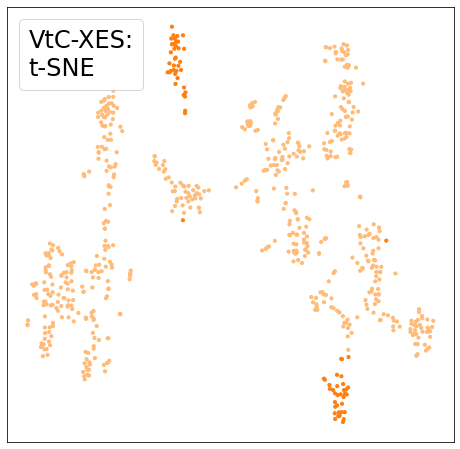

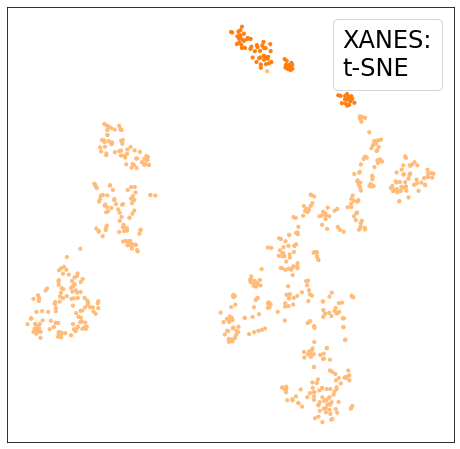

In [20]:
XES_TSNE, XANES_TSNE, XES_tsnemap, XANES_tsnemap, X_coord, hiddenCIDs = get_tsne_maps(coordcodemap)

xestsneplt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, XES_tsnemap, colorcodemap=coordcodemap,
             mode='XES', method='t-SNE', hiddencids=hiddenCIDs, fontsize=24, size=10)
xanestsneplt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, XANES_tsnemap, colorcodemap=coordcodemap,
             mode='XANES', method='t-SNE', hiddencids=hiddenCIDs, fontsize=24, size=10)
 
add_point_pubchem_link(xestsneplt, X_coord)
add_point_label(xestsneplt, X_coord)

add_point_pubchem_link(xanestsneplt, X_coord)
add_point_label(xanestsneplt, X_coord)

# Charge

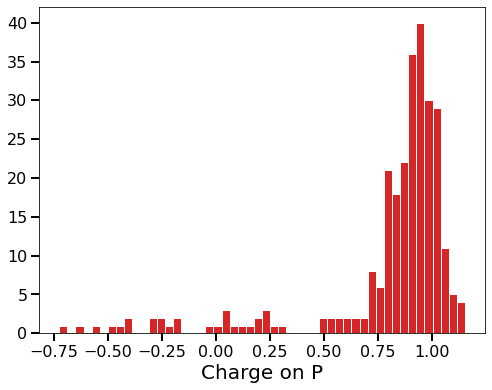

In [21]:
chargemap_coord = {compound['CID']:compound['Charge'] for compound in X_coord}

charges = [v for k,v in chargemap_coord.items() if v != -1]
fig, ax = plt.subplots(figsize=(8,6))
histogram = plt.hist(charges, bins=50, color=plt.cm.tab20(0.3), edgecolor='w')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Charge on P', fontsize=20)
ax.tick_params(direction='out', width=2, length=8)

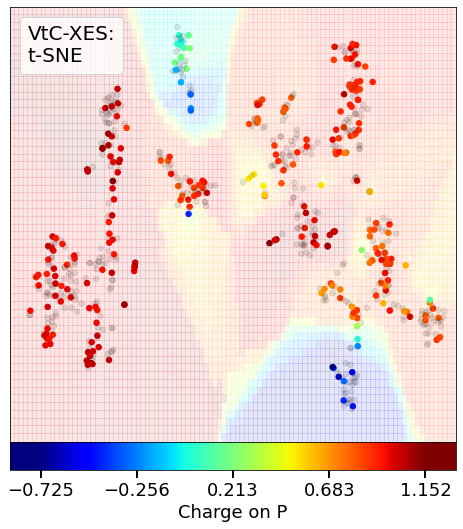

In [22]:
hiddencids = [compound['CID'] for compound in X_coord if compound['Charge'] == -1]

kwargs = {'Charge': [-0.9,2.]}
for compound in X_coord:
    add = 0
    for k in kwargs.keys():
        if k == 'Charge':
            min_c, max_c = kwargs[k]
            if compound[k] <= max_c and compound[k] >= min_c:
                add += 1
        elif compound[k] in kwargs[k]:
            add += 1
    if add != len(kwargs.keys()):   
        hiddencids += [compound['CID']]

shown_cidmap = {compound['CID']:compound['Charge'] for compound in X_coord if compound['CID'] not in hiddencids}

charge_values = list(shown_cidmap.values())
min_charge = np.min(charge_values)
max_charge = np.max(charge_values)

scaled_chargemap = {cid:(charge - min_charge) / (max_charge - min_charge) for cid,charge in shown_cidmap.items()}

size = 30
colormap = plt.cm.jet

tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, XES_tsnemap,mode='XES',
                        hiddenalpha=0.1, method='t-SNE', fontsize=20,
                        colormap=colormap, hiddencids=hiddencids, size=size,
                        colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
                        cbarlim=(min_charge, max_charge), label='Charge on P', heatmap=True)

## Phosphate subclusters

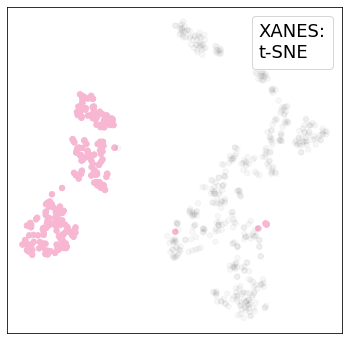

In [23]:
kwargs = {'Class': ['phosphate']}
tsne_plt = plot_dim_red(plt.subplots(figsize=(6,6)), X_coord, XANES_tsnemap, size=30,
                         colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.03,
                         mode='XANES', method='t-SNE', fontsize=18, verbose=False, **kwargs)

In [24]:
tsne_phosphates = np.array([XANES_tsnemap[c['CID']] for c in X_data_classed if c['Class'] == 'phosphate'])
cids_phosphates = [c['CID'] for c in X_data_classed if c['Class'] == 'phosphate']

dbscan_clustering = DBSCAN(eps=3, min_samples=1).fit(tsne_phosphates)
dbscan_clustermap = {cid:cluster for cid,cluster in zip(cids_phosphates, dbscan_clustering.labels_)}

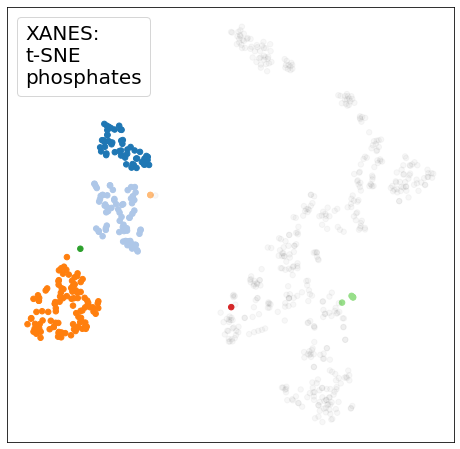

In [25]:
kwargs = {'Class': ['phosphate']}

############ plot all phosphates with clusters indicated by DBSCAN
phosphate_clustermap = {}
for c in X_data_classed:
    if c['Class'] == 'phosphate':
        phosphate_clustermap[c['CID']] = dbscan_clustermap[c['CID']] + 1
    else:
        phosphate_clustermap[c['CID']] = 0
              
select_clusters = [1,2,3]
X_phosphate = [c for c in X_data_classed if phosphate_clustermap[c['CID']] in select_clusters]

colormap = {c['CID']:phosphate_clustermap[c['CID']] for c in X_data_classed \
          if phosphate_clustermap[c['CID']] in select_clusters}
binmap = {k:v*0.5 for k,v in colormap.items()}

############ tsne plot all phosphates with clusters indicated by DBSCAN
tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, XANES_tsnemap, size=30,
                        colorcodemap=phosphate_clustermap, coloralpha=1., hiddenalpha=0.03,
                        mode='XANES', method='t-SNE\nphosphates', fontsize=20, **kwargs)

add_point_pubchem_link(tsne_plt, X_coord)
add_point_label(tsne_plt, X_coord)

# ############ spaghetti plot all phosphates with clusters indicated by DBSCAN
# spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode='XANES',
#                                colorcodemap=colormap, binmap=binmap,
#                                hiddenalpha=0, coloralpha=0.3, **kwargs)

# ############ spaghetti plot of average clusters indicated by DBSCAN
# spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode='XANES',
#                                colorcodemap=colormap, binmap=binmap, linewidth=4,
#                                hiddenalpha=0, coloralpha=0.6, average_bins=True, **kwargs)

# ############ tsne plot of selected cids for each cluster
# cid_select = [25195353, 151197, 278]
# kwargs = {'CID':cid_select}

# tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, XANES_tsnemap, size=65,
#                         colorcodemap=phosphate_clustermap, coloralpha=1., hiddenalpha=0.03,
#                         mode='XANES', method='t-SNE\nphosphates', fontsize=20, **kwargs)
# ############ spaghetti plot of selected cids for each cluster
# colormap = {}
# for c in X_data_classed:
#     if c['CID'] in cid_select:
#         colormap[c['CID']] = phosphate_clustermap[c['CID']]
# binmap = {k:v*0.5 for k,v in colormap.items()}

# spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode='XANES',
#                                colorcodemap=colormap, binmap=binmap, linewidth=5,
#                                hiddenalpha=0, coloralpha=0.6, **kwargs)

### Other subset analysis

In [41]:
%matplotlib notebook

<IPython.core.display.Javascript object>


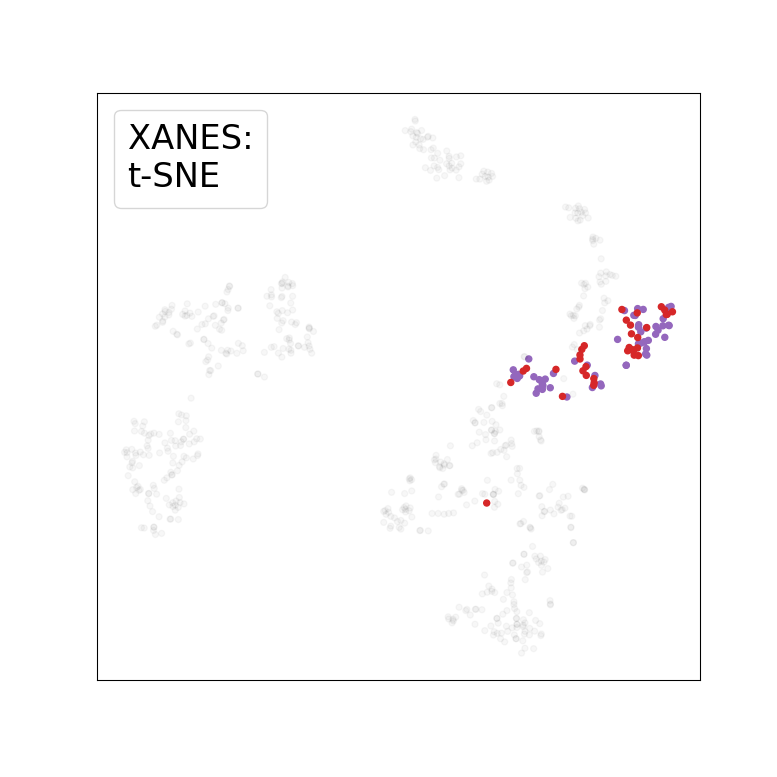

<IPython.core.display.Javascript object>


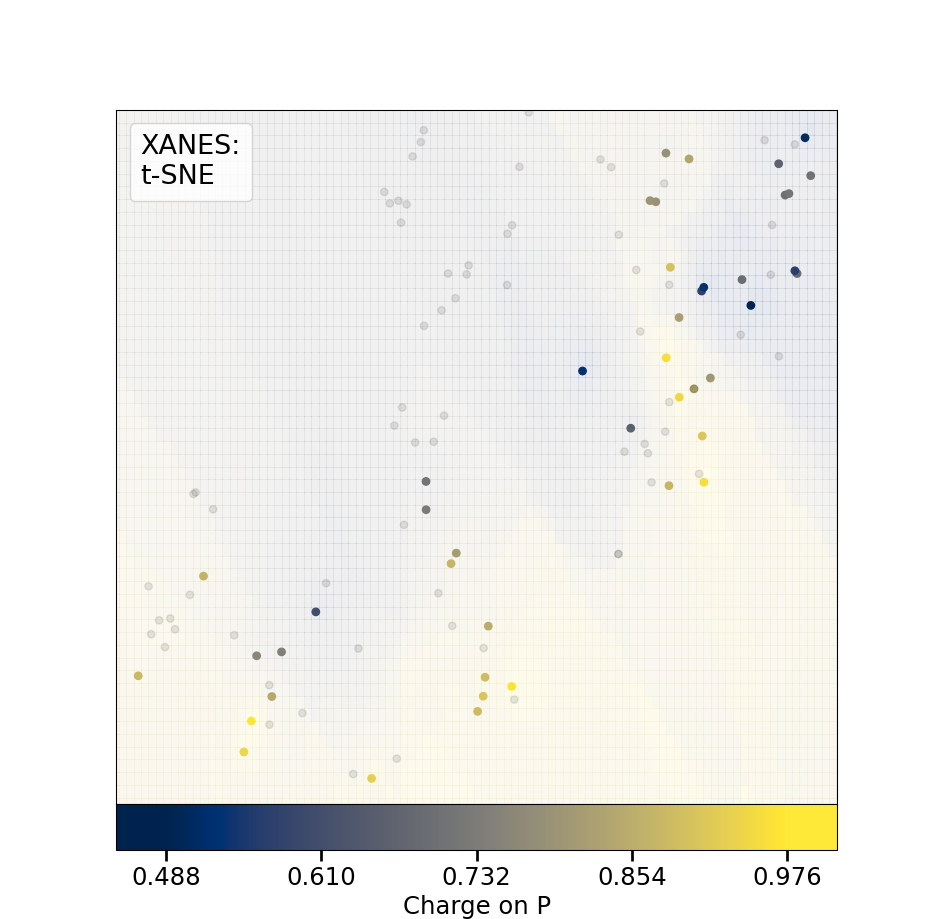

In [43]:
# select = ['phosphite_ester', 'phosphonite', 'phosphinite', 'trialkyl_phosphine']
# select = ['phosphate', 'phosphonate', 'phosphinate', 'phosphine_oxide', 'phosphorane']
select = ['phosphinate', 'phosphenic_acid']

kwargs = {'Class': select}
colormap = plt.cm.tab20

for mode in ['XANES']:
    if mode == 'XANES':
        tsnemap = XANES_tsnemap
    else:
        tsnemap = XES_tsnemap
    #################### tsne plot
    tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, tsnemap, size=20,
                            colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.03,
                            mode=mode, method='t-SNE', fontsize=25, colormap=colormap, **kwargs)
    
    add_point_pubchem_link(tsne_plt, X_coord)
    add_point_label(tsne_plt, X_coord)

    #################### tsne subset plot using kwargs
#     X_subset, tsnemap_sub = get_subset_plots(mode=mode, perplexity=10, **kwargs)

#     tsne_sub_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, tsnemap_sub,
#                                 colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.1,
#                                 mode=mode, method=f't-SNE on\nsubset', size=30, fontsize=25,
#                                 colormap=colormap,  **kwargs)
#     add_point_pubchem_link(tsne_sub_plt, X_subset)
#     add_point_label(tsne_sub_plt, X_subset)

#     #################### DBSCAN on tsne subplot using kwargs
#     tsne_subset = np.array([tsnemap[c['CID']] for c in X_data_classed if c['Class'] in select])
#     cids_subset = [c['CID'] for c in X_data_classed if c['Class'] in select]
    
#     # apply DBSCAN
#     dbscan_clustering = DBSCAN(eps=4, min_samples=1).fit(tsne_subset)
#     dbscan_clustermap = {cid:cluster for cid,cluster in zip(cids_subset, dbscan_clustering.labels_)}
    
#     # create DBSCAN subset clustermap
#     clustermap = {}
#     for c in X_data_classed:
#         if c['Class'] in select:
#             clustermap[c['CID']] = dbscan_clustermap[c['CID']] + 2
#         else:
#             clustermap[c['CID']] = 0

#     select_clusters = [2,3]
#     X_subset = [c for c in X_data_classed if clustermap[c['CID']] in select_clusters]

#     colormap = {c['CID']:clustermap[c['CID']] for c in X_data_classed \
#               if clustermap[c['CID']] in select_clusters}
#     binmap = {k:v*0.3 for k,v in colormap.items()}
    
#     #################### DBSCAN tsne plot
#     dbscan_tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, tsnemap, size=30,
#                                    colorcodemap=clustermap, coloralpha=1., hiddenalpha=0.03,
#                                    mode=mode, method='t-SNE\nsubset', fontsize=20, **kwargs)
    
#     #################### DBSCAN spaghetti plot using DBSCAN clusters
#     spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode=mode,
#                                    colorcodemap=colormap, binmap=binmap,
#                                    hiddenalpha=0, coloralpha=0.3, **kwargs)
    
#     ############ spaghetti plot of average clusters indicated by DBSCAN
#     avg_spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode=mode,
#                                        colorcodemap=colormap, binmap=binmap, linewidth=4,
#                                        hiddenalpha=0, coloralpha=0.6, average_bins=True, **kwargs)

#     ############ tsne plot of selected cids for each cluster
#     cid_select = [71447305, 23415768]
#     kwargs = {'CID':cid_select}

#     tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, tsnemap, size=65,
#                             colorcodemap=clustermap, coloralpha=1., hiddenalpha=0.03,
#                             mode=mode, method='t-SNE\nsubset', fontsize=20, **kwargs)
    
#     ############ spaghetti plot of selected cids for each cluster
#     colormap = {}
#     for c in X_data_classed:
#         if c['CID'] in cid_select:
#             colormap[c['CID']] = clustermap[c['CID']]
#     binmap = {k:v*0.3 for k,v in colormap.items()}

#     spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode=mode,
#                                    colorcodemap=colormap, binmap=binmap, linewidth=5,
#                                    hiddenalpha=0, coloralpha=0.6, **kwargs)

    #################### charge heatmap
    X_subset = X_coord
    hiddencids = [compound['CID'] for compound in X_subset if compound['Charge'] == -1]

#     kwargs = {'Charge': [-0.9,2.]}
    for compound in X_subset:
        add = 0
        for k in kwargs.keys():
            if k == 'Charge':
                min_c, max_c = kwargs[k]
                if compound[k] <= max_c and compound[k] >= min_c:
                    add += 1
            elif compound[k] in kwargs[k]:
                add += 1
        if add != len(kwargs.keys()):   
            hiddencids += [compound['CID']]

    shown_cidmap = {compound['CID']:compound['Charge'] for compound in X_subset if compound['CID'] not in hiddencids}

    charge_values = list(shown_cidmap.values())
    min_charge = np.min(charge_values)
    max_charge = np.max(charge_values)

    scaled_chargemap = {cid:(charge - min_charge) / (max_charge - min_charge) for cid,charge in shown_cidmap.items()}

    size = 30
    colormap = plt.cm.cividis

    charge_plt = plot_dim_red(plt.subplots(figsize=(8,8)),  X_subset, tsnemap, mode=mode,
                              hiddenalpha=0.1, method='t-SNE', fontsize=20,
                              colormap=colormap, hiddencids=hiddencids, size=size,
                              colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
                              cbarlim=(min_charge, max_charge), label='Charge on P', heatmap=True)

## Subsets that include P bonded to atoms other than C or O

In [27]:
# %matplotlib notebook

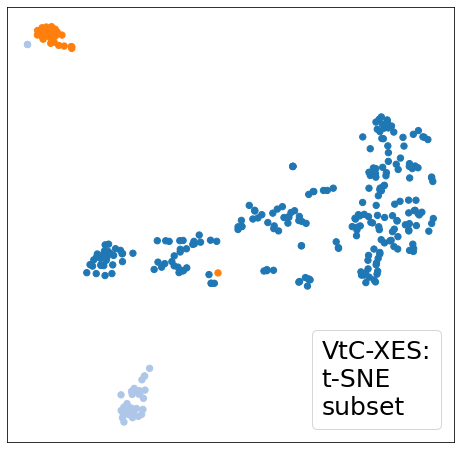

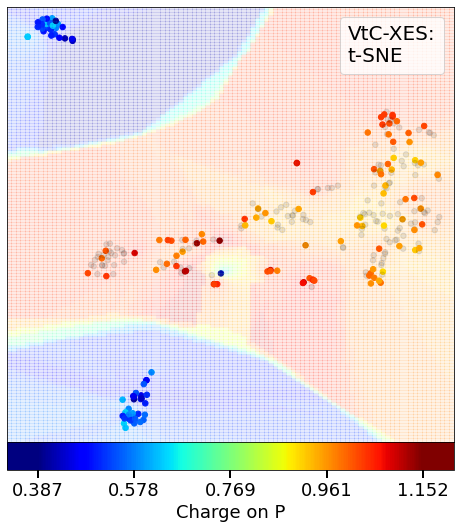

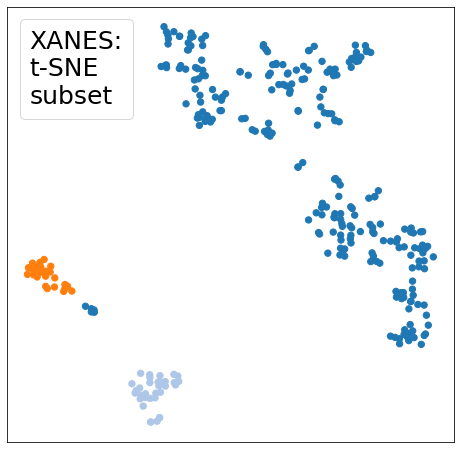

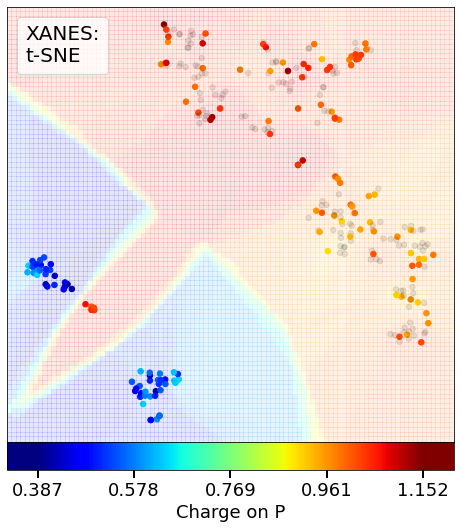

In [28]:
# phosphorane subclasses
# codemap = phosphoranecodemap
# bin_names = list(PHOSPHORANECODES.keys())
# select = ['phosphorane', 'nitrogen_phosphorane','phosphine_oxide','sulfur_phosphorane']

# sulfur subclasses
codemap = sulfurcodemap
select = ['phosphate', 'phosphorothioate', 'dithiophosphate']
bin_names = list(SULFURCODES.keys())

# bins = [1 for name in bin_names]
# hist(bins, [c.replace('_', ' ') for c in bin_names], verbose=False)

XES_TSNE, XANES_TSNE, XES_tsnemap, XANES_tsnemap, X_subset, hiddenCIDs = get_tsne_maps(codemap,
                                                                                       xanes_perplexity=15,
                                                                                       xes_perplexity=20)
kwargs = {'Class': select}

for mode in ['XES', 'XANES']:
    if mode == 'XANES':
        tsnemap = XANES_tsnemap
    else:
        tsnemap = XES_tsnemap
    #################### tsne plot
    tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, tsnemap, size=40,
                            colorcodemap=codemap, coloralpha=1., hiddenalpha=0.03,
                            mode=mode, method='t-SNE\nsubset', fontsize=25, **kwargs)
    
    add_point_pubchem_link(tsne_plt, X_subset)
    add_point_label(tsne_plt, X_subset)
    
    #################### charge heatmap
    hiddencids = [compound['CID'] for compound in X_subset if compound['Charge'] == -1]

    kwargs = {'Charge': [-0.9,2.]}
    for compound in X_subset:
        add = 0
        for k in kwargs.keys():
            if k == 'Charge':
                min_c, max_c = kwargs[k]
                if compound[k] <= max_c and compound[k] >= min_c:
                    add += 1
            elif compound[k] in kwargs[k]:
                add += 1
        if add != len(kwargs.keys()):   
            hiddencids += [compound['CID']]

    shown_cidmap = {compound['CID']:compound['Charge'] for compound in X_subset if compound['CID'] not in hiddencids}

    charge_values = list(shown_cidmap.values())
    min_charge = np.min(charge_values)
    max_charge = np.max(charge_values)

    scaled_chargemap = {cid:(charge - min_charge) / (max_charge - min_charge) for cid,charge in shown_cidmap.items()}

    size = 30
    colormap = plt.cm.jet

    charge_plt = plot_dim_red(plt.subplots(figsize=(8,8)),  X_subset, tsnemap, mode=mode,
                              hiddenalpha=0.1, method='t-SNE', fontsize=20,
                              colormap=colormap, hiddencids=hiddencids, size=size,
                              colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
                              cbarlim=(min_charge, max_charge), label='Charge on P', heatmap=True)

### Heirarchical Clustering

In [29]:
XES_TSNE, XANES_TSNE, XES_tsnemap, XANES_tsnemap, X_coord, hiddenCIDs = get_tsne_maps(coordcodemap)

In [30]:
Z_XES = linkage(XES_PCA, method='ward')
Z_XANES = linkage(XANES_PCA, method='ward')

In [31]:
cmap = plt.cm.viridis(np.linspace(0, 1, 4))
hierarchy.set_link_color_palette([to_hex(rgb) for rgb in cmap])

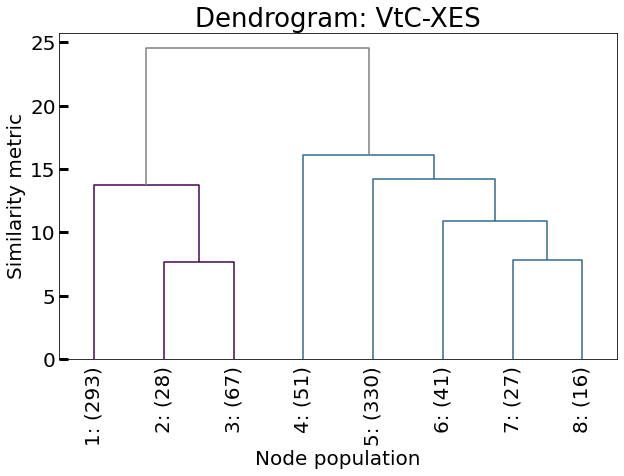

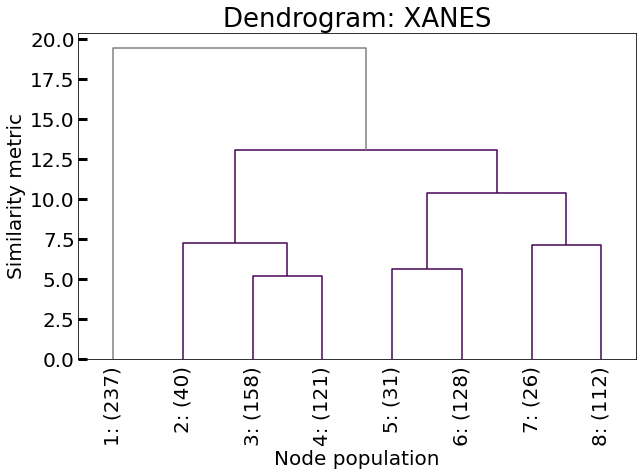

In [32]:
p = 8
labels = np.arange(1,p + 1)
Clusters = []

for mode, Z in zip(['VtC-XES', 'XANES'],[Z_XES, Z_XANES]):
    
    cluster_labels = fcluster(Z, p, criterion='maxclust')
    Clusters.append(cluster_labels)
    
    R = dendrogram(Z, truncate_mode='lastp', p=p, no_plot=True)
    temp = {R["leaves"][ii]:(labels[ii], R["ivl"][ii]) for ii in range(len(R["leaves"]))}

    def llf(xx):
        return "{}: {}".format(*temp[xx])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.title(f'Dendrogram: {mode}', fontsize=26)

    # plot the top levels of the dendrogram
    result = dendrogram(Z, truncate_mode='lastp', p=p,
                        above_threshold_color='gray',
                        leaf_label_func=llf,
                        leaf_rotation=90)

    ax.tick_params(axis='y',direction='in', width=3, length=9)
    plt.ylabel("Similarity metric", fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Node population", fontsize=20)
    plt.xticks(fontsize=20)

    plt.show()

In [33]:
clustermap1 = {compound['CID']:cluster for compound, cluster in zip(X_coord, Clusters[0])}
clustermap2 = {compound['CID']:cluster for compound, cluster in zip(X_coord, Clusters[1])}

classed_CIDs = np.array([c['CID'] for c in X_coord])

Correlation = {}
for cluster_label1 in np.arange(1,p+1):
    Corrs = []
    for cluster_label2 in np.arange(1,p+1):
        corr = get_correlation(classed_CIDs, cluster_label1, cluster_label2, clustermap1, clustermap2)
        Corrs.append(round(corr, 4))
    Correlation[cluster_label1] = np.max(Corrs)

Correlation

{1: 0.8103,
 2: 1.0,
 3: 0.75,
 4: 0.625,
 5: 0.3669,
 6: 0.2857,
 7: 0.0278,
 8: 0.125}

In [34]:
# for i in range(1,p + 1):
#     bool_arr = cluster_labels == i
#     compoundclasses = [c['Class'] for c in X_data_classed]
#     categorizer = list(compress(compoundclasses, bool_arr))

#     classnames = list(CLASSCODES.keys())[:-1]
#     bins = [np.sum(np.array(categorizer)==classname) for classname in classnames]
    
#     hist(bins, [c.replace('_', ' ') for c in classnames], xlabel=f'Cluster {i}', verbose=True)